In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 55% 111M/202M [00:00<00:00, 1.16GB/s]
100% 202M/202M [00:00<00:00, 811MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fraud-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import joblib

# Load Dataset

In [ ]:
fraud_train_data = pd.read_csv('/content/fraudTrain.csv')
fraud_test_data = pd.read_csv('/content/fraudTest.csv')
fraud_train_data.drop('Unnamed: 0', axis=1, inplace=True)
fraud_test_data.drop('Unnamed: 0', axis=1, inplace=True)

combined_data = pd.concat([fraud_train_data, fraud_test_data], axis=0)
combined_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# Remove Unnecessary Columns

In [ ]:
columns_to_drop = [
    'trans_date_trans_time',
    'dob',
    'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip',
    'job',
    'lat', 'long',
    'trans_num', 'unix_time',
    'merchant'
]
combined_data = combined_data.drop(columns=columns_to_drop)
combined_data

,category,amt,gender,city_pop,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,3495,36.011293,-82.048315,0
1,grocery_pos,107.23,F,149,49.159047,-118.186462,0
2,entertainment,220.11,M,4154,43.150704,-112.154481,0
3,gas_transport,45.00,M,1939,47.034331,-112.561071,0
4,misc_pos,41.96,M,99,38.674999,-78.632459,0
...,...,...,...,...,...,...,...
555714,health_fitness,43.77,M,519,39.946837,-91.333331,0
555715,kids_pets,111.84,M,28739,29.661049,-96.186633,0
555716,kids_pets,86.88,F,3684,46.658340,-119.715054,0
555717,travel,7.99,M,129,44.470525,-117.080888,0


In [ ]:
categorical_cols = ['category', 'gender']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    combined_data[col] = le.fit_transform(combined_data[col])
    label_encoders[col] = le

combined_data.head()

,category,amt,gender,city_pop,merch_lat,merch_long,is_fraud
0,8,4.97,0,3495,36.011293,-82.048315,0
1,4,107.23,0,149,49.159047,-118.186462,0
2,0,220.11,1,4154,43.150704,-112.154481,0
3,2,45.00,1,1939,47.034331,-112.561071,0
4,9,41.96,1,99,38.674999,-78.632459,0


In [17]:
print(combined_data['is_fraud'].value_counts())
print(combined_data['category'].value_counts())

is_fraud
0    1842743
1       9651
Name: count, dtype: int64
category
2     188029
4     176191
6     175460
12    166463
7     161727
11    139322
0     134118
1     130729
10    130085
5     122553
9     114229
8      90654
3      64878
13     57956
Name: count, dtype: int64


# Balance the Data

In [ ]:
df_majority = combined_data[combined_data.is_fraud == 0]
df_minority = combined_data[combined_data.is_fraud == 1]

df_majority_downsampled = df_majority.sample(n=12000, random_state=42)

balanced_data = pd.concat([df_majority_downsampled, df_minority])

print(balanced_data['is_fraud'].value_counts())

is_fraud
0    12000
1     9651
Name: count, dtype: int64


# Visualize training data

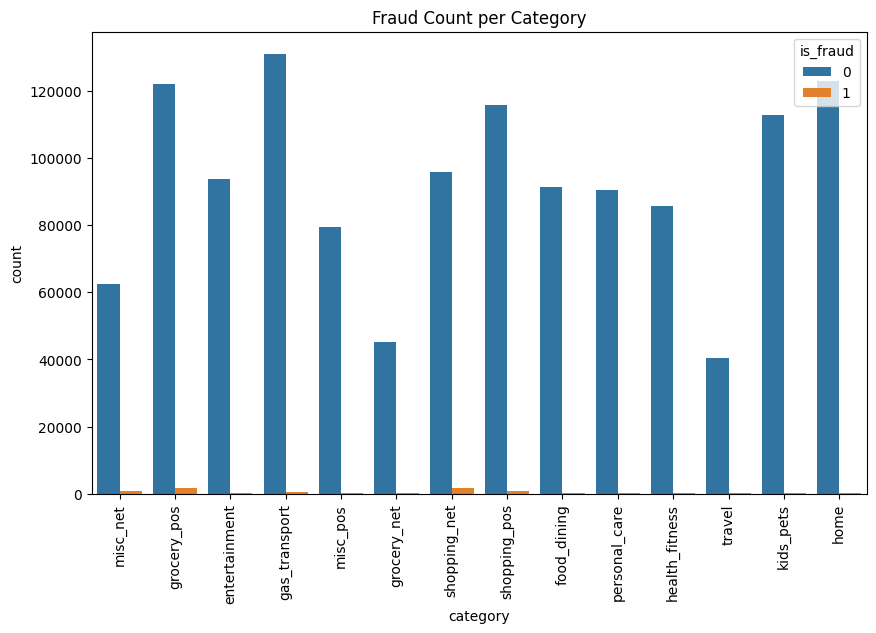

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_train_data, x='category', hue='is_fraud')
plt.title('Fraud Count per Category')
plt.xticks(rotation=90)
plt.show()

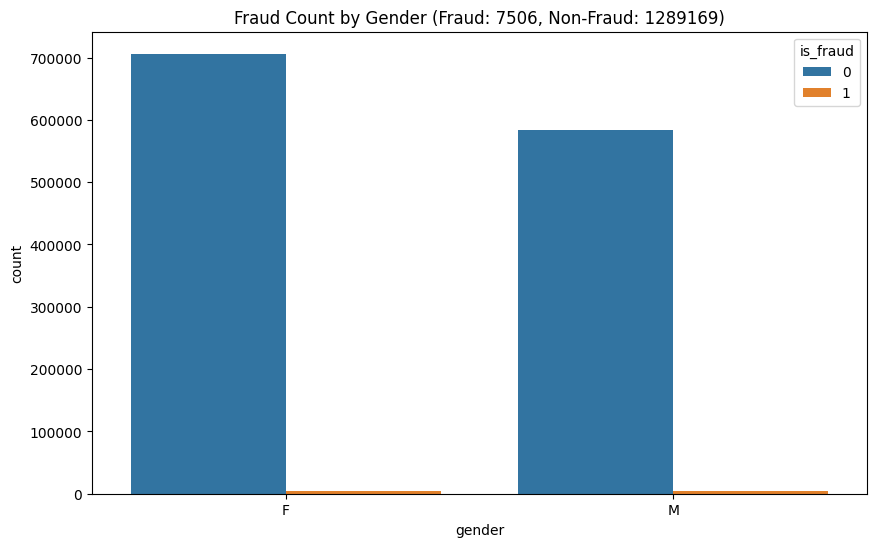

In [ ]:
fraud_counts = fraud_train_data['is_fraud'].value_counts()
fraud_count = fraud_counts[1]
non_fraud_count = fraud_counts[0]

plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_train_data, x='gender', hue='is_fraud')
plt.title(f'Fraud Count by Gender (Fraud: {fraud_count}, Non-Fraud: {non_fraud_count})')
plt.show()

In [18]:
X = balanced_data.drop('is_fraud', axis=1)
y = balanced_data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Display the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
numerical_cols = ['amt', 'merch_lat', 'merch_long', 'city_pop']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("Data split into train and test sets and numerical features scaled.")

Shape of X_train: (17320, 6)
Shape of X_test: (4331, 6)
Shape of y_train: (17320,)
Shape of y_test: (4331,)
Data split into train and test sets and numerical features scaled.


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, average_precision_score
svc = SVC(probability=True, random_state=42)

calibrated_svc = CalibratedClassifierCV(svc, method="sigmoid", cv=5)

calibrated_svc.fit(X_train, y_train)

probs = calibrated_svc.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)
pr_auc = average_precision_score(y_test, probs)

print(f"PR-AUC: {pr_auc:.4f}")

PR-AUC: 0.8738


In [ ]:
joblib.dump(calibrated_svc, "calibrated_model.pkl")


['calibrated_model.pkl']

# Define Models

In [ ]:
models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train models and collect accuracy scores

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

accuracy_scores = []
model_names = []
pr_auc_scores = [] # To store PR-AUC scores

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    model_names.append(name)

    # Get predicted probabilities for PR-AUC calculation
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVC that don't have predict_proba without probability=True
        y_pred_prob = model.decision_function(X_test)


    # Calculate PR-AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    pr_auc_scores.append(pr_auc)


    print(f"Accuracy of {name}: {accuracy}")
    print(f"PR-AUC of {name}: {pr_auc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Training Gradient Boosting...
Accuracy of Gradient Boosting: 0.9523439523439523
PR-AUC of Gradient Boosting: 0.9877287502039405
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1931
           1       0.96      0.95      0.95      1930

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861

Confusion Matrix:
[[1853   78]
 [ 106 1824]]

Training SVM...
Accuracy of SVM: 0.8671328671328671
PR-AUC of SVM: 0.8874399640369961
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1931
           1       0.96      0.76      0.85      1930

    accuracy                           0.87      3861
   macro avg       0.88      0.87      0.87      3861
weighted avg       0.88      0.87      0.87      3861

Confusion Matrix:
[[1873   58]
 [ 455 14

# Plot confusion matrices

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

PR-AUC: 0.9954490531317299


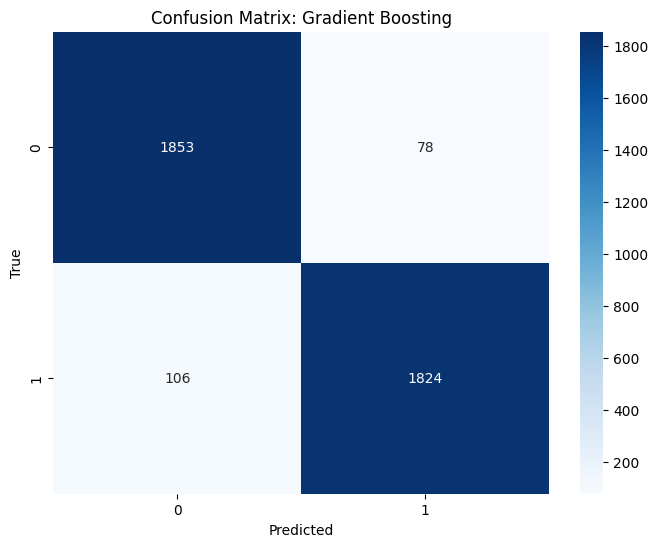

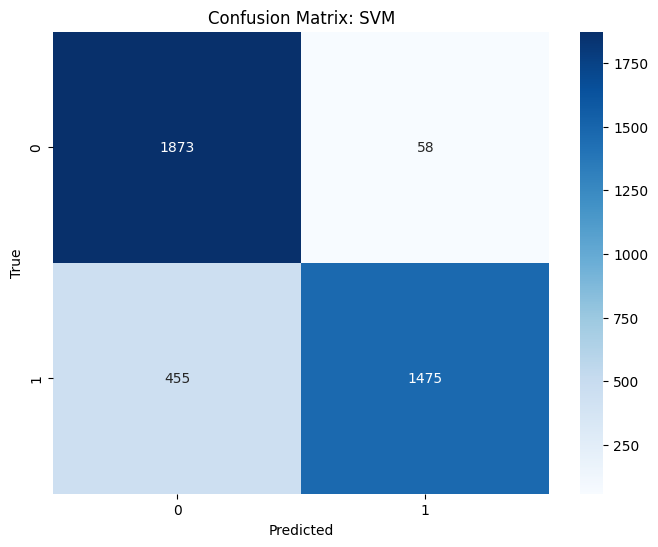

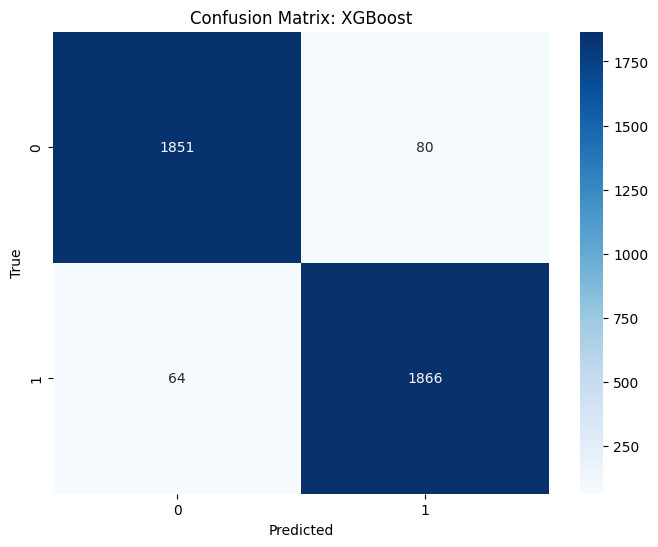

In [ ]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)

# Plot accuracy comparison

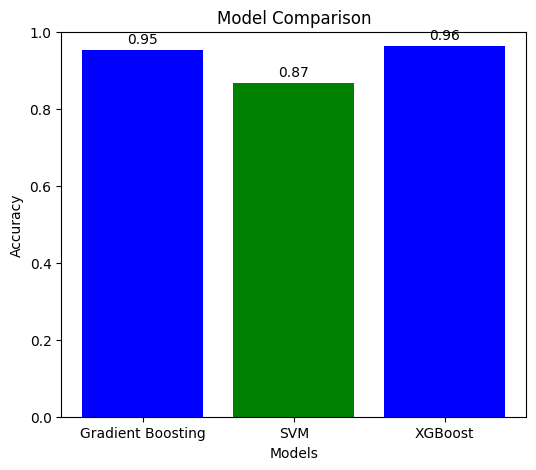

In [ ]:
plt.figure(figsize=(6, 5))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Assuming accuracy is a value between 0 and 1
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# Save the trained models

In [ ]:
import joblib

for name, model in models.items():
    filename = f'{name.replace(" ", "_").lower()}_model.pkl'
    joblib.dump(model, filename)
    print(f"Model saved: {filename}")

Model saved: gradient_boosting_model.pkl
Model saved: svm_model.pkl
Model saved: xgboost_model.pkl


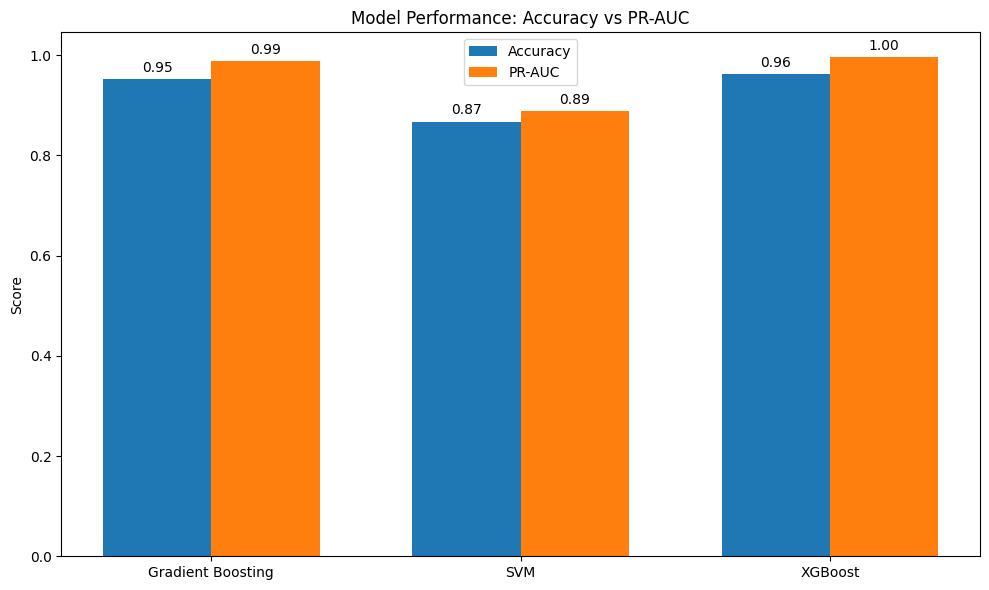

In [ ]:
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, pr_auc_scores, width, label='PR-AUC')

ax.set_ylabel('Score')
ax.set_title('Model Performance: Accuracy vs PR-AUC')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

**Reasoning**:
Load the saved model, scaler, and feature order using joblib as instructed.



In [ ]:
# After scaling
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Then train:
model.fit(X_scaled, y)

# Save feature names in correct order
joblib.dump(list(X.columns), "feature_order.pkl")


['feature_order.pkl']

In [ ]:
loaded_model = joblib.load("svm_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")
loaded_feature_order = joblib.load("feature_order.pkl")


new_transaction_data = {
    'amt': 50.0,
    'merch_lat': 40.7128,
    'merch_long': -74.0060,
    'city_pop': 8000000,
    'category': 1,
    'gender': 0,
}

new_data_df = pd.DataFrame([new_transaction_data])

template_df = pd.DataFrame(columns=loaded_feature_order)
for col in loaded_feature_order:
    if col in new_data_df.columns:
        template_df[col] = new_data_df[col]
    else:

        template_df[col] = 0

new_data_aligned = template_df
numerical_cols_loaded = ['amt', 'merch_lat', 'merch_long', 'city_pop']
new_data_aligned[numerical_cols_loaded] = loaded_scaler.transform(new_data_aligned[numerical_cols_loaded])

prediction = loaded_model.predict(new_data_aligned)
prediction_proba = loaded_model.predict_proba(new_data_aligned)[:, 1]

print(f"Prediction for new transaction (0: Not Fraud, 1: Fraud): {prediction[0]}")
print(f"Probability of Fraud: {prediction_proba[0]:.4f}")


if prediction[0] == 1:
    print("This transaction is predicted as potentially fraudulent.")
else:
    print("This transaction is predicted as not fraudulent.")



Prediction for new transaction (0: Not Fraud, 1: Fraud): 1
Probability of Fraud: 0.6794
This transaction is predicted as potentially fraudulent.
